# <font face = 'Palatino Linotype' color = '#EE6D50'>Techniques in Data Cleaning<font/>
#### <font face = 'Palatino Linotype' color = '#7A003D'> Organized by: Paolo G. Hilado MSc. (Data Science) <font/>
This notebook presents the importance of business and data understanding in the process of preparing data for analysis. Guided by business assumptions and the data dictionary, data cleaning could be done appropriately in a way that meets the expectations of operations. This is needed for accurate analysis of data; one that is effective in addressing business problems.

## <font face = 'Palatino Linotype' color = '#DC4C60'> Business Assumptions </font>

#### Customer Uniqueness
- Each Customer_ID must represent one unique individual.
- Duplicate IDs indicate data integration errors and must be deduplicated.

#### Subscription Dates
- Subscription_Start_Date cannot be after Subscription_End_Date.
- If End_Date is null, the subscription is considered active.

#### Churn Definition
- A customer is labeled as Churned = Yes if: Subscription was canceled voluntarily, OR Payment failed for 60 consecutive days.
- Otherwise, Churned = No.

#### Age Constraints
- Valid age range: 18–100 years.
- Values outside this range are treated as data entry errors.

#### Monthly Revenue
- Monthly_Fee must be ≥ 0.
- Negative values are assumed to be refund-entry errors.

#### Payment Status Standardization
- "paid", "Paid", "PAID" → standardized to Paid
- "fail", "declined", "error" → standardized to Failed
  
#### Missing Engagement Data
- Missing Monthly_App_Logins are assumed to be 0 only if the customer has an active subscription.
- If the subscription is inactive, engagement data after cancellation is discarded.
Customer Support Tickets

#### Multiple tickets in a day are counted individually.
- If Ticket_Count is negative → treated as invalid and removed.

#### Outlier Handling
- Monthly_App_Logins above the 99th percentile are capped (winsorized).
- Monthly_Fee above 3× standard plan price flagged for validation.

#### Categorical Consistency
- "M", "Male" → Male
- "F", "Female" → Female
- Others → Other

## <font face = 'Palatino Linotype' color = '#DC4C60'> Data Dictionary </font>

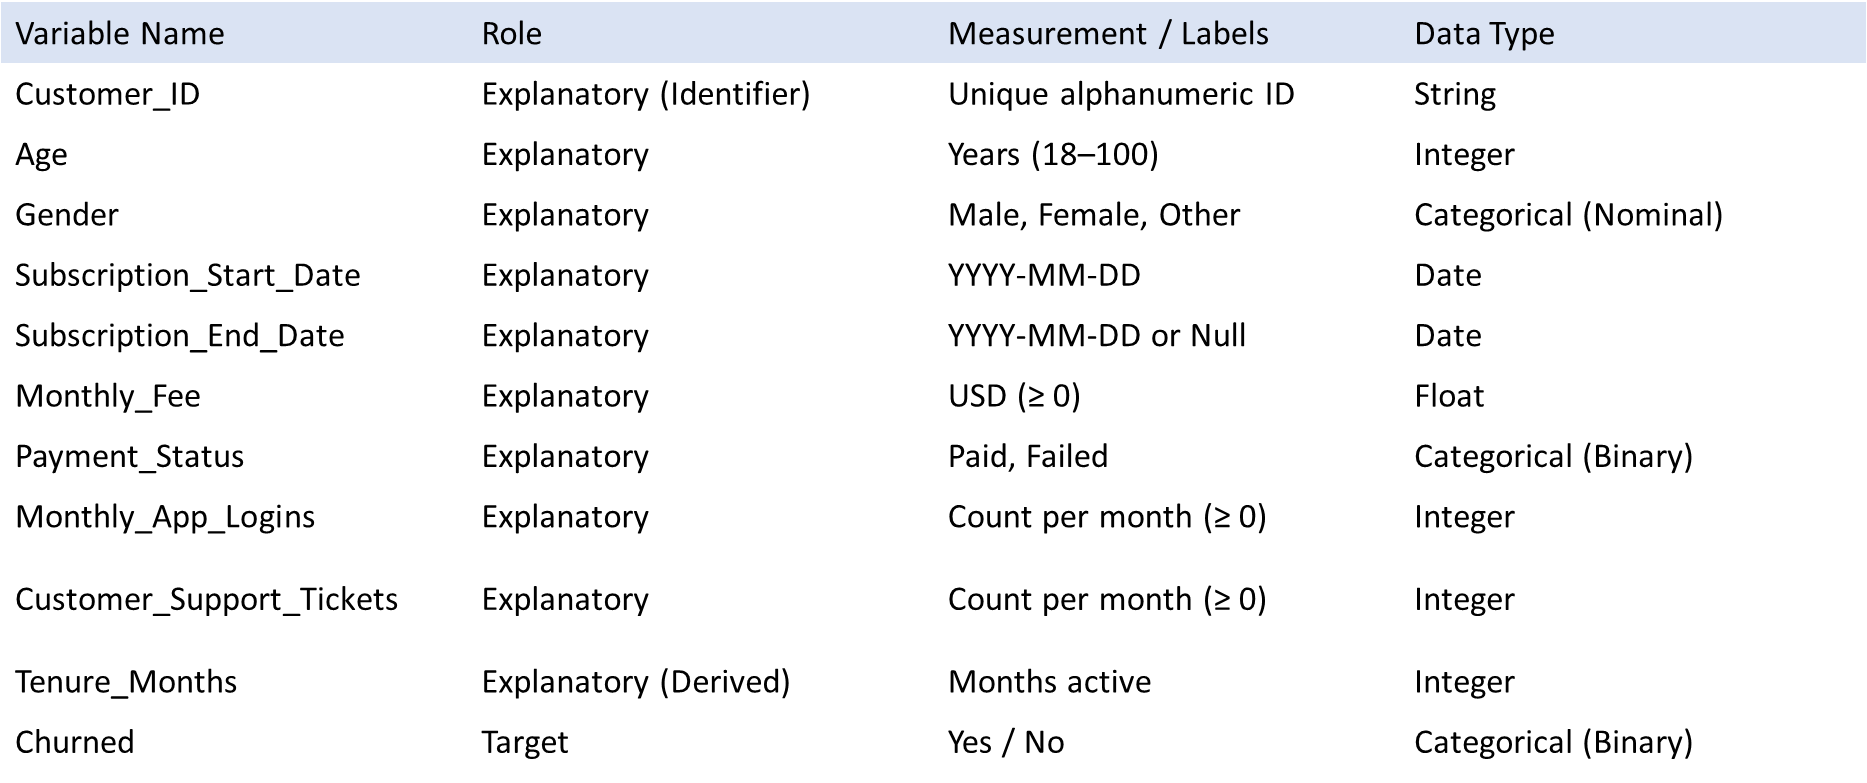

## <font face = 'Palatino Linotype' color = '#DC4C60'> Open the sample data set for data cleaning. </font>

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Import the dataset
df = pd.read_excel("Data Cleaning.xlsx")

In [3]:
# Check out the sample data set
df

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
0,C001,25,M,2024-01-01,NaT,25,paid,18.0,1,No
1,C002,17,Female,2024-02-01,NaT,25,PAID,22.0,0,No
2,C003,45,F,2024-03-01,2024-02-01,25,Paid,15.0,2,Yes
3,C004,200,Male,2024-01-15,NaT,-25,Paid,12.0,-1,No
4,C005,38,female,2024-01-01,2024-06-01,25,fail,140.0,3,Yes
5,C006,29,NaN,2024-02-10,NaT,25,declined,NaN,1,No
6,C001,25,M,2024-01-01,NaT,25,paid,18.0,1,No


## <font face = 'Palatino Linotype' color = '#DC4C60'> Identified Data Issues based on Business and Data Understanding</font>

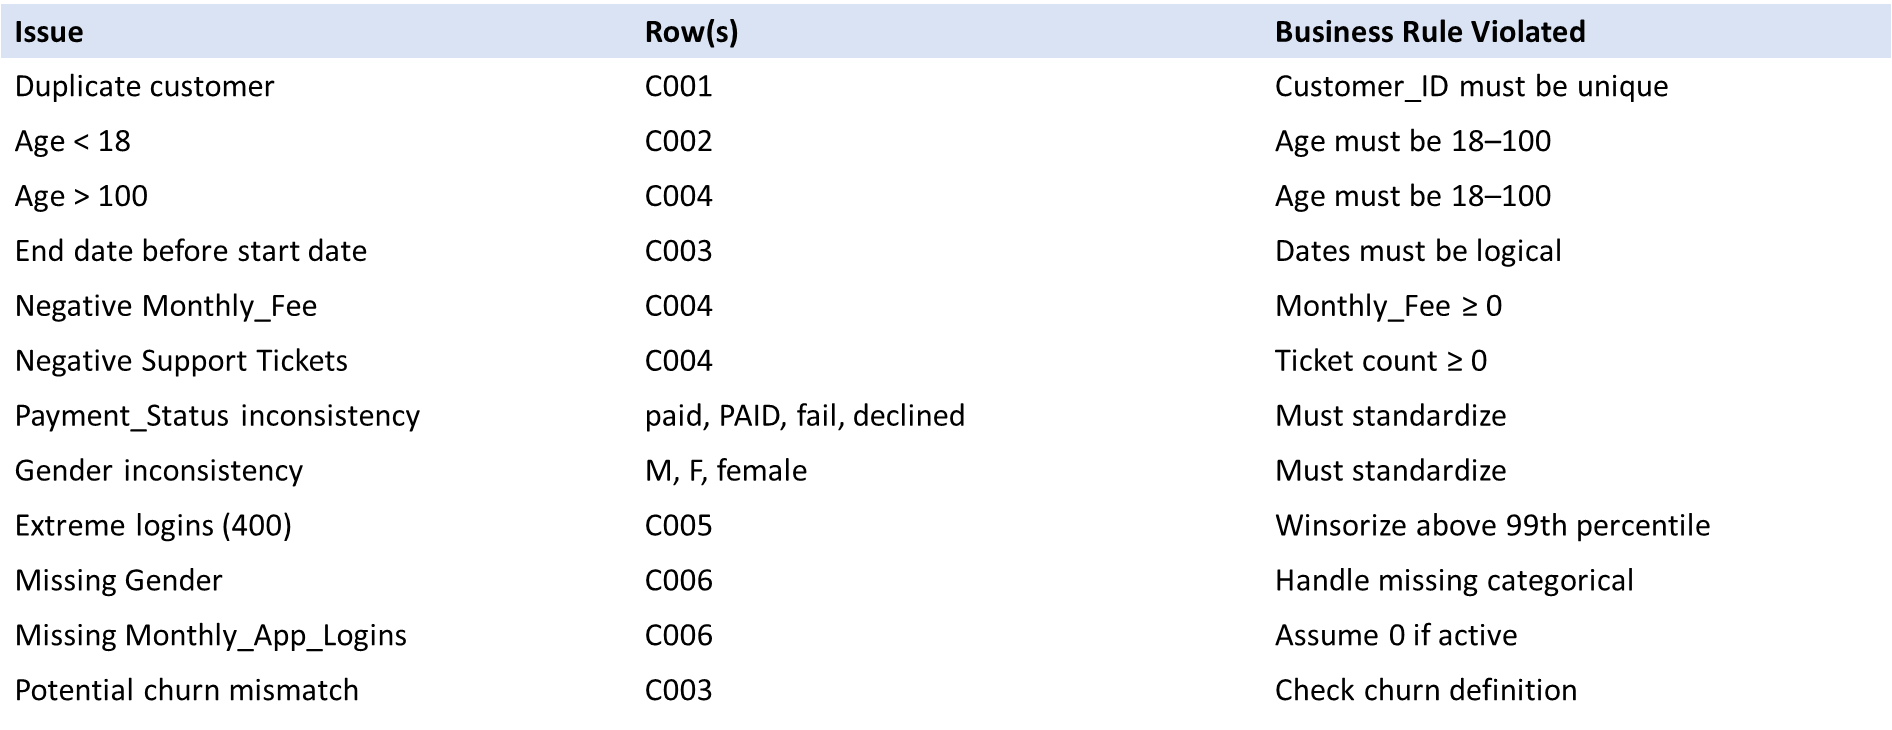

## <font face = 'Palatino Linotype' color = '#DC4C60'> Data Cleaning Techniques to Address Data Issues </font>

In [4]:
# Address the duplicate customer ID: Drop the duplicate row
# Overwrite df with our new data frame that excludes row with index 6
df = df.drop(6)

In [5]:
# Show the changes of the overwrite
df

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
0,C001,25,M,2024-01-01,NaT,25,paid,18.0,1,No
1,C002,17,Female,2024-02-01,NaT,25,PAID,22.0,0,No
2,C003,45,F,2024-03-01,2024-02-01,25,Paid,15.0,2,Yes
3,C004,200,Male,2024-01-15,NaT,-25,Paid,12.0,-1,No
4,C005,38,female,2024-01-01,2024-06-01,25,fail,140.0,3,Yes
5,C006,29,NaN,2024-02-10,NaT,25,declined,NaN,1,No


#### ✅ <font face = 'Palatino Linotype' color = '#B57170'> Duplicate Customer Issue Addressed </font>

In [ ]:
# Address client age that are outside the range provided in business assumptions.
# Very Important: Discuss this with data owners first and have it confirmed.
# Confirmation from data owners: 
# Those with age 17 are data entry errors and should be 18. 
# The record with age 200 years old is an error and should be 100.

In [6]:
# Locate the clients with age outside the range provided in business assumptions.
invalid_age = df[~df["Age"].between(18, 100)] #tilde

In [7]:
# Show the records with invalid age
invalid_age

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
1,C002,17,Female,2024-02-01,NaT,25,PAID,22.0,0,No
3,C004,200,Male,2024-01-15,NaT,-25,Paid,12.0,-1,No


In [8]:
# Change the invalid age of 17 into 18 for ALL RECORDS.
df["Age"] = df["Age"].replace(17, 18)

In [9]:
# Show the changes made on record index 1
df

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
0,C001,25,M,2024-01-01,NaT,25,paid,18.0,1,No
1,C002,18,Female,2024-02-01,NaT,25,PAID,22.0,0,No
2,C003,45,F,2024-03-01,2024-02-01,25,Paid,15.0,2,Yes
3,C004,200,Male,2024-01-15,NaT,-25,Paid,12.0,-1,No
4,C005,38,female,2024-01-01,2024-06-01,25,fail,140.0,3,Yes
5,C006,29,NaN,2024-02-10,NaT,25,declined,NaN,1,No


In [10]:
# Change the invalid age of 200 into 100 for ALL RECORDS.
df["Age"] = df["Age"].replace(200, 100)

In [11]:
# Show the changes made on record index 3
df

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
0,C001,25,M,2024-01-01,NaT,25,paid,18.0,1,No
1,C002,18,Female,2024-02-01,NaT,25,PAID,22.0,0,No
2,C003,45,F,2024-03-01,2024-02-01,25,Paid,15.0,2,Yes
3,C004,100,Male,2024-01-15,NaT,-25,Paid,12.0,-1,No
4,C005,38,female,2024-01-01,2024-06-01,25,fail,140.0,3,Yes
5,C006,29,NaN,2024-02-10,NaT,25,declined,NaN,1,No


#### ✅ <font face = 'Palatino Linotype' color = '#B57170'> Issues on Client Age Addressed </font>

In [12]:
# Workout issues on start and end of subscription.
# Identify records where subscription end goes before subscription start
invalid_sub_dates = df[df["Subscription_End_Date"] < df["Subscription_Start_Date"]]

In [13]:
# Show records with invalid_sub_dates
invalid_sub_dates

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
2,C003,45,F,2024-03-01,2024-02-01,25,Paid,15.0,2,Yes


In [14]:
# Address data issues on subscription dates as provided in business assumptions.
# Very Important: Discuss this with data owners first and have it confirmed.
# Confirmation from data owners: 
# For customer_ID C003, the subscription_start_date and subscription_end_date have been interchanged.
# Create a mask for the specific customer
mask = df["Customer_ID"] == "C003"

# Swap the dates only for that row
df.loc[mask, ["Subscription_Start_Date", "Subscription_End_Date"]] = \
    df.loc[mask, ["Subscription_End_Date", "Subscription_Start_Date"]].values

In [15]:
# Check out the changes
df

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
0,C001,25,M,2024-01-01,NaT,25,paid,18.0,1,No
1,C002,18,Female,2024-02-01,NaT,25,PAID,22.0,0,No
2,C003,45,F,2024-02-01,2024-03-01,25,Paid,15.0,2,Yes
3,C004,100,Male,2024-01-15,NaT,-25,Paid,12.0,-1,No
4,C005,38,female,2024-01-01,2024-06-01,25,fail,140.0,3,Yes
5,C006,29,NaN,2024-02-10,NaT,25,declined,NaN,1,No


#### ✅ <font face = 'Palatino Linotype' color = '#B57170'> Issues on Customer Subscription Addressed </font>

In [16]:
# Address negative monthly fee and tickets provided in business assumptions.
# Very Important: Discuss this with data owners first and have it confirmed.
# Confirmation from data owners: 
# Those with negative monthly fees should be positive.
# This is the same for those who have negative tickets.
invalid_rows_fee_tix = df[(df["Monthly_Fee"] < 0) | (df["Customer_Support_Tickets"] < 0)]

In [17]:
# Show the invalid rows for Monthly_Fee and Customer_Support_Tickets
invalid_rows_fee_tix

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
3,C004,100,Male,2024-01-15,NaT,-25,Paid,12.0,-1,No


In [18]:
# Convert the said values into positive as confirmed by the data owners.
mask = (df["Monthly_Fee"] < 0) | (df["Customer_Support_Tickets"] < 0)
df.loc[mask, ["Monthly_Fee", "Customer_Support_Tickets"]] = \
    df.loc[mask, ["Monthly_Fee", "Customer_Support_Tickets"]].abs()

In [19]:
# Check out the changes on the data frame
df

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
0,C001,25,M,2024-01-01,NaT,25,paid,18.0,1,No
1,C002,18,Female,2024-02-01,NaT,25,PAID,22.0,0,No
2,C003,45,F,2024-02-01,2024-03-01,25,Paid,15.0,2,Yes
3,C004,100,Male,2024-01-15,NaT,25,Paid,12.0,1,No
4,C005,38,female,2024-01-01,2024-06-01,25,fail,140.0,3,Yes
5,C006,29,NaN,2024-02-10,NaT,25,declined,NaN,1,No


#### ✅ <font face = 'Palatino Linotype' color = '#B57170'> Negative Monthly_Fee and Customer_Support_Tickets Issue Addressed</font>

In [20]:
# Let us standardize payment_status and gender based on business assumptions
# Recall the following for Payment_Status:
# "paid", "Paid", "PAID" → standardized to Paid
# "fail", "declined", "error" → standardized to Failed

status_map = {
    "paid": "Paid",
    "Paid": "Paid",
    "PAID": "Paid",
    "fail": "Failed",
    "declined": "Failed",
    "error": "Failed"
}

df["Payment_Status"] = df["Payment_Status"].replace(status_map)

In [21]:
# Check out the changes
df

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
0,C001,25,M,2024-01-01,NaT,25,Paid,18.0,1,No
1,C002,18,Female,2024-02-01,NaT,25,Paid,22.0,0,No
2,C003,45,F,2024-02-01,2024-03-01,25,Paid,15.0,2,Yes
3,C004,100,Male,2024-01-15,NaT,25,Paid,12.0,1,No
4,C005,38,female,2024-01-01,2024-06-01,25,Failed,140.0,3,Yes
5,C006,29,NaN,2024-02-10,NaT,25,Failed,NaN,1,No


In [22]:
# Let us do the same for Gender
# Recall the following for Gender
# "M", "Male" → Male
# "F", "Female" → Female
# Others → Other

status_map = {
    "M": "Male",
    "F": "Female",
    "female": "Female",
    "Others": "Other",
}

df["Gender"] = df["Gender"].replace(status_map)

In [23]:
# Check out the changes
df

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
0,C001,25,Male,2024-01-01,NaT,25,Paid,18.0,1,No
1,C002,18,Female,2024-02-01,NaT,25,Paid,22.0,0,No
2,C003,45,Female,2024-02-01,2024-03-01,25,Paid,15.0,2,Yes
3,C004,100,Male,2024-01-15,NaT,25,Paid,12.0,1,No
4,C005,38,Female,2024-01-01,2024-06-01,25,Failed,140.0,3,Yes
5,C006,29,NaN,2024-02-10,NaT,25,Failed,NaN,1,No


#### ✅ <font face = 'Palatino Linotype' color = '#B57170'> Payment_Status and Gender Labels have been Standardized</font>

In [24]:
# Now let us deal with outliers in the Monthly_App_Logins
# Business assumption states that Outliers should be winsorized.
# First let us detect outliers (edge case).
# Step One: Compute the Inter Quartile Range
Q1 = df["Monthly_App_Logins"].quantile(0.25)
Q3 = df["Monthly_App_Logins"].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(7.0)

In [28]:
Q1 - 1.5*IQR

np.float64(4.5)

In [29]:
Q3 + 1.5*IQR

np.float64(32.5)

In [30]:
# Step Two: Identify the outlier
outliers = (df["Monthly_App_Logins"] < Q1 - 1.5*IQR) | (df["Monthly_App_Logins"] > Q3 + 1.5*IQR)
df_outliers = df[outliers]
df_outliers

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
4,C005,38,Female,2024-01-01,2024-06-01,25,Failed,140.0,3,Yes


In [31]:
df["Monthly_App_Logins"].quantile(0.99)

np.float64(135.28)

In [32]:
# Step Three: Winsorize the Outlier (have it at 99th Percentile)
# Compute the 99th percentile
cap_value = df["Monthly_App_Logins"].quantile(0.99)
# Replace anything greater than cap_value with cap_value
df["Monthly_App_Logins"] = df["Monthly_App_Logins"].clip(upper=cap_value)
# Check the changes made
df

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
0,C001,25,Male,2024-01-01,NaT,25,Paid,18.00,1,No
1,C002,18,Female,2024-02-01,NaT,25,Paid,22.00,0,No
2,C003,45,Female,2024-02-01,2024-03-01,25,Paid,15.00,2,Yes
3,C004,100,Male,2024-01-15,NaT,25,Paid,12.00,1,No
4,C005,38,Female,2024-01-01,2024-06-01,25,Failed,135.28,3,Yes
5,C006,29,NaN,2024-02-10,NaT,25,Failed,NaN,1,No


#### ✅ <font face = 'Palatino Linotype' color = '#B57170'> Monthly_App_Logins Outlier Addressed </font>

In [33]:
df

,Customer_ID,Age,Gender,Subscription_Start_Date,Subscription_End_Date,Monthly_Fee,Payment_Status,Monthly_App_Logins,Customer_Support_Tickets,Churned
0,C001,25,Male,2024-01-01,NaT,25,Paid,18.00,1,No
1,C002,18,Female,2024-02-01,NaT,25,Paid,22.00,0,No
2,C003,45,Female,2024-02-01,2024-03-01,25,Paid,15.00,2,Yes
3,C004,100,Male,2024-01-15,NaT,25,Paid,12.00,1,No
4,C005,38,Female,2024-01-01,2024-06-01,25,Failed,135.28,3,Yes
5,C006,29,NaN,2024-02-10,NaT,25,Failed,NaN,1,No


In [34]:
df.to_excel("Sample Clean Data.xlsx")